# Data Augmentation
___
## Wofür Data Augmentation

- Erstellen von größeren Datenmengen zum Training
- Erhöhung der Diversität des Datensatzes, daruch im Idealfall bessere Generalisierung der KI

## Herausforderungen bei Data Augmentation

***Brauchbare Augmentation***
- Es sollen nur Augmentationen erstellt werden, die in den realen Daten vorkommen können

***Vervielfältigung von Biases***
- Vorhanderen ungleichheiten in den Trainingsdaten könnten verstärkt werden

<hr>



# Augmentation Beispiel anhand von Bildtransformationen

In [1]:
from PIL import Image
import PIL
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import sys
import torch
import numpy as np
import torchvision.transforms as T
import torchvision.transforms.functional as TF


## Transformation Examples

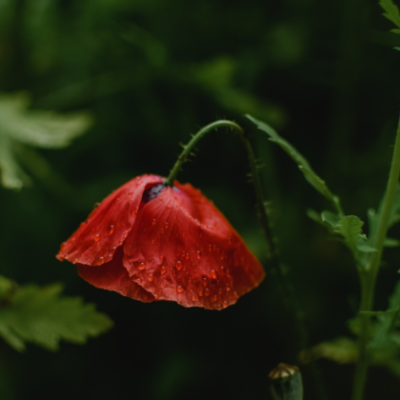

In [2]:
# Load Image

orig_img = Image.open(Path("images/flower.png"))
img_width, img_height = orig_img.size
orig_img


### Grayscale

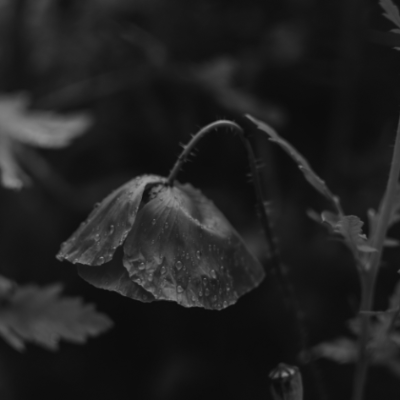

In [3]:

gray_img = T.Grayscale()(orig_img)
gray_img

### Flip

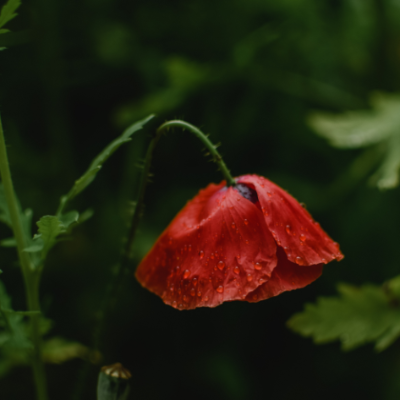

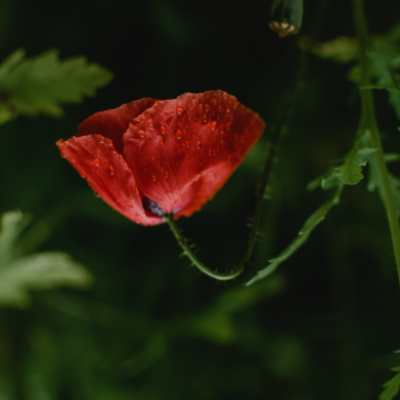

In [4]:
hflip_img = TF.hflip(orig_img)
vflip_img = TF.vflip(orig_img)

display(hflip_img, vflip_img)

### Translate


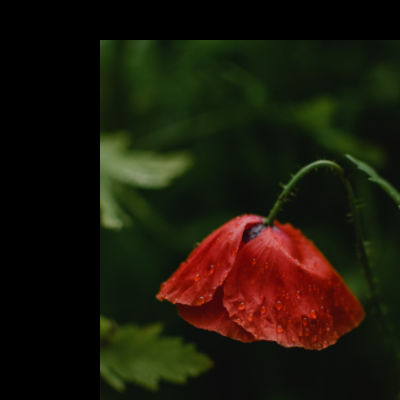

In [5]:
translate_img = TF.affine(orig_img, angle = 0, translate=[100 ,40], scale=1, shear=0)
translate_img

### Rotate

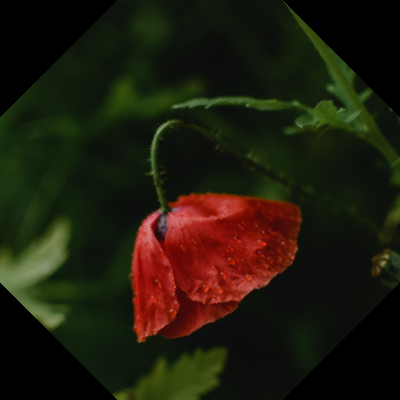

In [6]:
rotate_img = TF.rotate(orig_img, angle = 45.0)
rotate_img

### Random affine
    

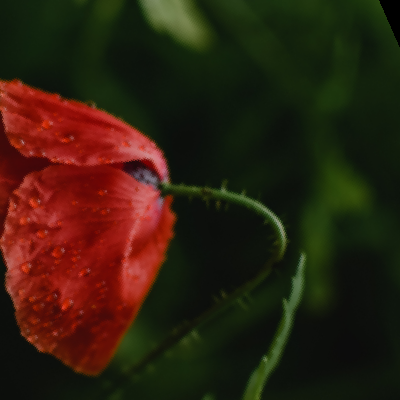

In [7]:
affine_img = T.RandomAffine(degrees=(30,70), translate=(0.1, 0.3), scale=(1, 1.5))(orig_img)

affine_img



### Center cropping

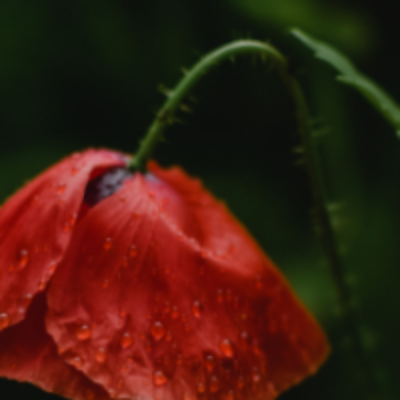

In [8]:
crop_size = 200

crop_img = T.CenterCrop(crop_size)(orig_img)
crop_img = T.Resize(img_height)(crop_img)
crop_img

### Random Cropping

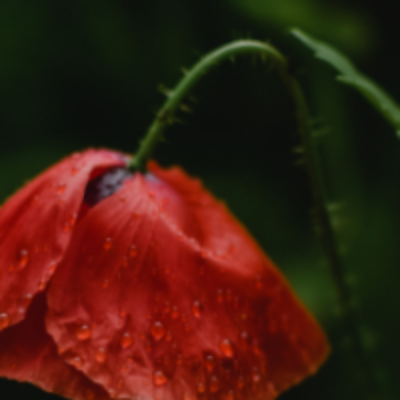

In [9]:
rand_crop_img = T.RandomCrop(200)(orig_img)
rand_crop_img = T.Resize(img_height)(crop_img)
rand_crop_img

### Add Gaussian Blur

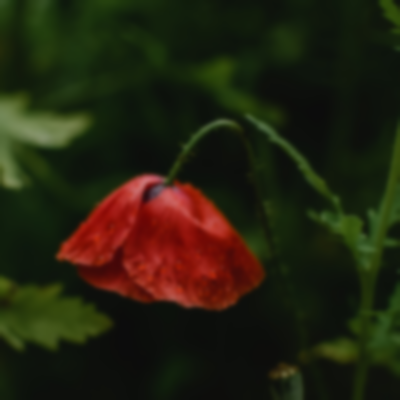

In [10]:
blurred_img = T.GaussianBlur(kernel_size=(33,33), sigma=(2, 2))(orig_img) 
blurred_img

### Perspective

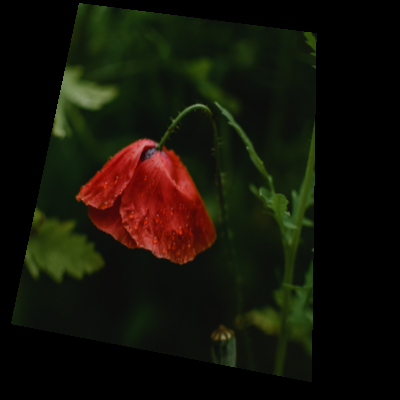

In [11]:
pers_img = T.RandomPerspective( p=1)(orig_img)
pers_img

### Elastic Transformation

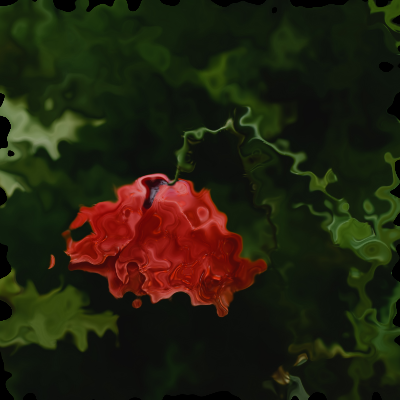

In [12]:
elastic_img = T.ElasticTransform(alpha= 400.0)(orig_img)
elastic_img

### ColorJitter 

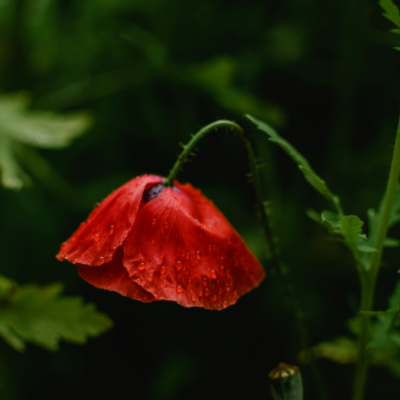

In [13]:
jitter_img = T.ColorJitter(brightness = 0.5, contrast=0.5, saturation=0.5)(orig_img)
# HUE Sinnvoll?
jitter_img

### Random Augment  

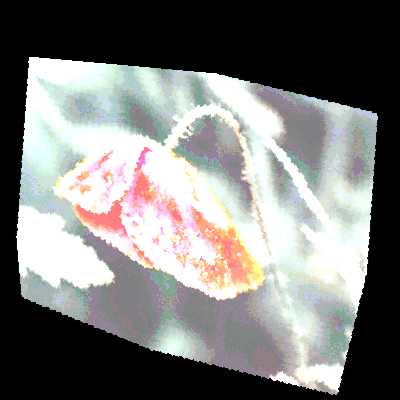

In [14]:
rand_img = T.RandAugment(num_ops=25)(orig_img) # between 1 -25
rand_img


Compose

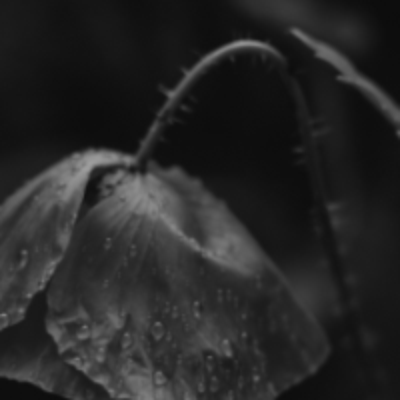

In [15]:
transforms = T.Compose([
    T.CenterCrop(200),
    T.Grayscale(),
    T.Resize(img_width)
])

img = transforms(orig_img)
img

## Example Dataset

In [16]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, data_name, transform):
        self.data_name = data_name
        self.transform = transform

    def __len__(self):
        return 1

    def __getitem__(self, index):

        data = self.data_name[index]
        img = Image.open(Path(data))

        
        if self.transform:
            img = self.transform(img)

        return img

In [17]:
# Calculate mean of Dataset

images = ["test\dog2.png", "test\dog3.png"]

channels_sum, channels_squared_sum, num_batches = 0,0,len(images)
for img in images:
    img =  Image.open(Path(img))
    img_t = T.ToTensor()(img)
    channels_sum += img_t.mean([1,2])
    channels_squared_sum += img_t.std([1,2])
    
    
    mean = channels_sum / num_batches
    std = (channels_squared_sum / num_batches - mean ** 2) ** 0.5

mean, std

    


(tensor([0.3815, 0.4058, 0.3888]), tensor([0.3337, 0.1591, 0.2570]))

In [18]:
my_transformations = T.Compose([
    T.RandomGrayscale(0.5),
    T.RandomCrop(150),
    T.Resize(400),
    T.ToTensor(),
    T.Normalize((0.3815, 0.4058, 0.3888), (0.3337, 0.1591, 0.2570)),
    T.ToPILImage()
])

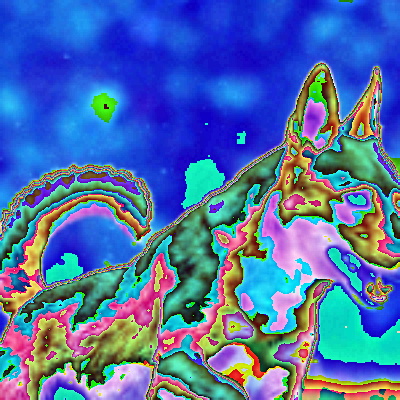

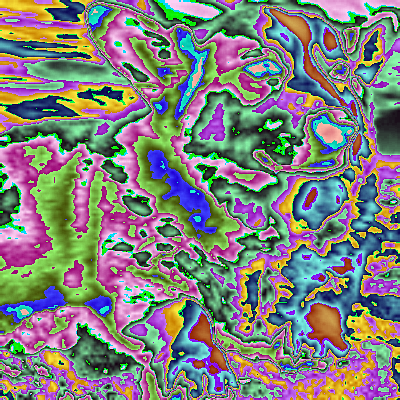

In [19]:
names =  ["test\dog2.png", "test\dog3.png"]
dataset = Dataset(names, my_transformations )

for img in dataset:
    display(img)